In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/fakenews_dataset.csv")

In [3]:
data = data.drop(columns=["Unnamed: 0"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26000 non-null  int64 
 1   title   25320 non-null  object
 2   author  23540 non-null  object
 3   text    25954 non-null  object
 4   label   26000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1015.8+ KB


In [5]:
data.shape

(26000, 5)

### Exploratory Data Analysis

In [6]:
data["length"] = data["text"].str.len()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      26000 non-null  int64  
 1   title   25320 non-null  object 
 2   author  23540 non-null  object 
 3   text    25954 non-null  object 
 4   label   26000 non-null  int64  
 5   length  25954 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ MB


In [8]:
data.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938.0


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26000.0,12999.500000,7505.697836,0.0,6499.75,12999.5,19499.25,25999.0
label,26000.0,0.510538,0.499899,0.0,0.00,1.0,1.00,1.0
length,25954.0,4572.113932,5104.336732,1.0,1642.25,3386.5,6319.75,142961.0


### Distribution of length

<AxesSubplot:>

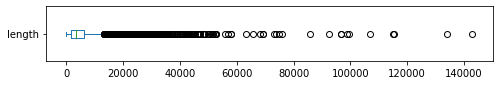

In [10]:
data['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

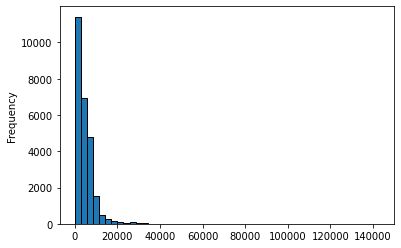

In [11]:
data['length'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

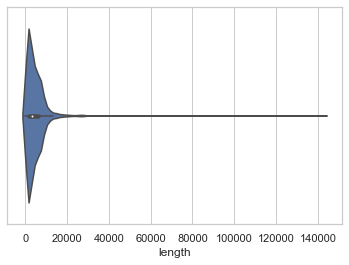

In [12]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["length"])

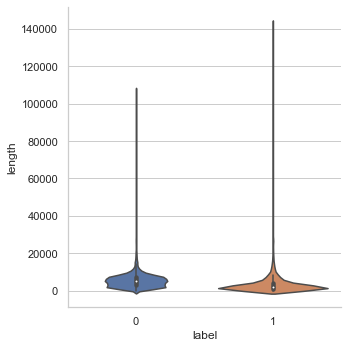

In [13]:
import seaborn as sns

#label = data[['label',"length"]] #.isin for check condition
sns.catplot(data=data[['label',"length"]], x='label', y="length", kind='violin')

## Clean and Pre-processing Data

### checking Missing Data

In [14]:
data.isna().sum()

id           0
title      680
author    2460
text        46
label        0
length      46
dtype: int64

In [15]:
len(data["title"].unique())

24693

### missing title

In [16]:
null_title = data[data["title"].isna() == True]
null_title.shape

(680, 6)

In [17]:
null_title_fakenews = null_title[null_title["label"].isin([1])]
null_title_fakenews.head()

,id,title,author,text,label,length
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1,679.0
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1,135.0
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1,533.0
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1,736.0
196,196,NaN,Raffie,They got the heater turned up on high.,1,38.0


In [18]:
null_title_realnews = null_title[null_title["label"].isin([0])]
null_title_realnews

,id,title,author,text,label,length
20822,20822,NaN,Dale Johnson,VERSE 9. THE STATE OF NATIONAL INSECURITY\nThe...,0,10680.0
21387,21387,NaN,Enjoykin4,A leading US senator: US Supporting War in Syr...,0,5289.0
22559,22559,NaN,Enjoykin4,A leading US senator: US Supporting War in Syr...,0,5289.0
23225,23225,NaN,Enjoykin4,A leading US senator: US Supporting War in Syr...,0,5289.0
24261,24261,NaN,tokyowashi (noreply@blogger.com),United States Marine Field McConnell Plum Cit...,0,24205.0


### null title --> real news : 5 , fake news : 675 

### Found duplicated row 

In [21]:
data.drop_duplicates(subset=["author","title","text"],inplace=True)

### drop duplicated value from title and text columns

In [22]:
data.shape

(25846, 6)

### missing author

In [8]:
null_author = data[data["author"].isna() == True]
null_author.shape

(2419, 5)

In [9]:
null_author_fakenews = null_author[null_author["label"].isin([1])]
null_author_fakenews.head()

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
43,43,Can I have one girlfriend without you bastards...,NaN,Can I have one girlfriend without you bastards...,1


In [10]:
null_author_realnews = null_author[null_author["label"].isin([0])]
null_author_realnews.head()

,id,title,author,text,label
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
685,685,The New York Times to Offer Open Access on Web...,NaN,The New York Times is inviting readers to take...,0
2785,2785,How the Poll Was Conducted - The New York Times,NaN,The latest New York News Poll is based on te...,0
3203,3203,37 Who Saw Murder Didn’t Call the Police - The...,NaN,"For more than half an hour 38 respectable, law...",0
3470,3470,"‘My First Gay Bar’: Rachel Maddow, Andy Cohen ...",NaN,"For generations of gays and lesbians, especial...",0


### null author --> real news : 147 , fake news : 2313

### missing text

In [11]:
null_text = data[data["text"].isna() == True]
null_text.shape

(46, 5)

In [12]:
null_text_fakenews = null_text[null_text["label"].isin([1])]
null_text_fakenews.head()

,id,title,author,text,label
142,142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1


In [13]:
null_text_fakenews.shape

(46, 5)

### insight : all missing text value is fake news

In [20]:
data_export = data.copy()

In [21]:
data_export["title"].fillna("No-Title",inplace=True)
data_export["author"].fillna("Anonymous",inplace=True)
data_export["text"].fillna(" ",inplace=True)
data_export["length"].fillna(0,inplace=True)

In [22]:
data_export.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

In [ ]:
#data_export.to_csv("fakenewsDatasetClean.csv", encoding='utf-8', index=False)

In [ ]:
#data.isna().sum()

### Fill all missing data 

### data_1 fill na with " " 

In [34]:
data_1 = data.copy()

In [31]:
data_1["title"].fillna("",inplace=True)
data_1["author"].fillna("",inplace=True)
data_1["text"].fillna("",inplace=True)
data_1["length"].fillna(0,inplace=True)

In [32]:
data_1.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

In [33]:
data_1.tail(10)

,id,title,author,text,label,length
25990,25990,Secret Service Shoots Man Near White House - T...,Julie Hirschfeld Davis and Michael S. Schmidt,WASHINGTON — A man who approached the White...,1,2367.0
25991,25991,E3 Hands-On with ’South Park: The Fractured bu...,Lucas Nolan,The title of South Park: The Fractured but Who...,1,3271.0
25992,25992,Earth To Ammosexuals: NRA Admits No One Is Com...,Natalie Dailey,Earth To Ammosexuals: NRA Admits No One Is Com...,1,2420.0
25993,25993,Toyota Recalls 1.4 Million Vehicles as 2nd Maj...,Hiroko Tabuchi and Jonathan Soble,Public concern about faulty automobile airbags...,0,5096.0
25994,25994,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,Pres. Trump on if “tapes” exist of his convers...,1,1315.0
25995,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0,18376.0
25996,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1,3415.0
25997,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0,5682.0
25998,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,1,2634.0
25999,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,0,8500.0


## Word Cloud

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
type(data["title"][0])

In [ ]:
data["title"][0]

In [ ]:
datawc = data.copy()

In [ ]:
datawc = datawc.drop(["length"],axis=1)

In [ ]:
datawc.isna().sum()

In [ ]:
datawc.head()

In [ ]:
fakewc = datawc[datawc["label"].isin([1])]

In [ ]:
fakewc.isna().sum()

In [ ]:
fakewc.head()

In [ ]:
fakewc["title"].fillna("None-Title",inplace=True)

In [ ]:
fakewc["author"].fillna("Anonymous",inplace=True)

In [ ]:
fakewc["text"].fillna(0,inplace=True)

In [ ]:
fakewc.isna().sum()

In [ ]:
def tokenize(text):
    word = re.findall(r'[\w]+', str(text))
    return word

In [ ]:
def remove_stop(tokens):
    return [str(t) for t in tokens if t.lower() not in stop_words]

In [ ]:
def lowertext(tokens):
    return [str(t.lower() ) for t in tokens]

### Remove stop words and normalization

In [45]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import re
import numpy as np

In [ ]:
fakewc["tokens_title"] = fakewc["title"].apply(tokenize)

In [ ]:
fakewc["tokens_title"] = fakewc["tokens_title"].apply(remove_stop)

In [ ]:
fakewc["tokens_title"] = fakewc["tokens_title"].apply(lowertext)

In [ ]:
fakewc["tokens_title"]

In [ ]:
fakewc.head()

## N-gram

In [ ]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [ ]:
fakewc["bigram_title"] = fakewc["tokens_title"].apply(ngrams,stopwords=stop_words)

In [ ]:
bgram = fakewc["bigram_title"]
bgram

In [ ]:
wctokens = fakewc["tokens_title"].explode().values
wctokens

In [ ]:
wcbigrams = fakewc["bigram_title"].explode().values
wcbigrams

In [ ]:
count_tokens_title = Counter(wctokens)

In [ ]:
count_tokens_title.most_common(10)

In [ ]:
count_tokens_title[np.nan]

In [ ]:
del count_tokens_title[np.nan]

In [ ]:
wctokens

In [ ]:
count_tokens_title.most_common(10)

In [ ]:
countbg_title = Counter(wcbigrams)

In [ ]:
countbg_title.most_common(10)

In [ ]:
del countbg_title[np.nan]

In [ ]:
countbg_title.most_common(10)

In [ ]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

## Word Cloud with NaN title

In [ ]:
wc.generate_from_frequencies(countbg_title)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Data_2 fill author with Anonymous, title fill with None-title and text fill with " "

In [25]:
data_2 = data.copy()

In [26]:
data_2.isna().sum()

id           0
title      630
author    2419
text        46
label        0
length      46
dtype: int64

In [27]:
data_2["title"].fillna("None-title",inplace=True)
data_2["author"].fillna("Anonymous",inplace=True)
data_2["text"].fillna(" ",inplace=True)
data_2["length"].fillna(0,inplace=True)

In [28]:
data_2[data_2["author"].isin(["Anonymous"])]

,id,title,author,text,label,length
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,Anonymous,Ever wonder how Britain’s most iconic pop pian...,1,2729.0
8,8,Excerpts From a Draft Script for Donald Trump’...,Anonymous,Donald J. Trump is scheduled to make a highly ...,0,8177.0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,Anonymous,Email \nSince Donald Trump entered the electio...,1,2231.0
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,Anonymous,Massachusetts Cop’s Wife Busted for Pinning Fa...,1,2801.0
31,31,Israel is Becoming Pivotal to China’s Mid-East...,Anonymous,Country: Israel While China is silently playin...,1,7050.0
...,...,...,...,...,...,...
25952,25952,Flotilla of Russian warships sails into the Me...,Anonymous,"09:01 EST, 12 November 2016 | Updated: 18:54 E...",1,4042.0
25963,25963,TRUMP RECEIVED BY MASSIVE CROWD IN ALBUQUERQUE...,Anonymous,Home / News / TRUMP RECEIVED BY MASSIVE CROWD ...,1,1251.0
25970,25970,Reinventing Democracy in America Starts by Vot...,Anonymous,Reinventing Democracy in America Starts by Vot...,0,7709.0
25972,25972,The Postmodern Stalinism of the Western Media ...,Anonymous,Originally appeared at Chronicles Magazine \nI...,0,4154.0


In [29]:
data_2[data_2["title"].isin(["None-title"])]

,id,title,author,text,label,length
53,53,None-title,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1,679.0
120,120,None-title,Anonymous,"Same people all the time , i dont know how you...",1,135.0
124,124,None-title,SeekSearchDestory,"You know, outside of any morality arguments, i...",1,533.0
140,140,None-title,Anonymous,There is a lot more than meets the eye to this...,1,736.0
196,196,None-title,Raffie,They got the heater turned up on high.,1,38.0
...,...,...,...,...,...,...
25645,25645,None-title,fundamentaly flawed humanity,anyone heard of the protective insert for wome...,1,225.0
25724,25724,None-title,Snowonweb,great article,1,13.0
25755,25755,None-title,John Doyle,Obama himself denied any knowledge of the serv...,1,176.0
25763,25763,None-title,Barry Branscum,Right. Well that clears that up.,1,32.0


In [30]:
data_2.isna().sum()

id        0
title     0
author    0
text      0
label     0
length    0
dtype: int64

####################

### Prepare Data [Data1 : author, title, text fillna with " "]

In [31]:
data_1['text_corpus'] = data_1['author'] +' '+ data_1['title'] + ' ' + data_1['text']

NameError: name 'data_1' is not defined

In [32]:
X = data.drop(columns="label", axis=1) 
Y = data["label"]

### Prepare Data [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [33]:
data_2["text_corpus"] = data_2["author"] + " " + data_2["title"] + " " + data_2["text"]

In [34]:
X_2 = data_2.drop(columns="label",axis=1)
Y_2 = data_2["label"]

### Prepare Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [36]:
data_3 = data_2.copy()

In [37]:
data_3.drop(columns=["text_corpus"],inplace=True)

In [38]:
data_3["text_corpus"] = data_3["author"] + " " + data_3["title"]

## Test clean text

In [52]:
testclean = data_1["text_corpus"][0]
testclean

'Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [ ]:
#cleaned_text = re.sub("’t",' ',cleaned_text)
#cleaned_text

In [ ]:
#cleaned_text = re.sub('[^a-zA-Z\@]',' ',cleaned_text)
#cleaned_text

In [53]:
cleaned_text = re.sub('[^a-zA-Z\@\’]',' ',testclean)
cleaned_text

'Darrell Lucus House Dem Aide  We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide  We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October          Subscribe Jason Chaffetz on the stump in American Fork  Utah   image courtesy Michael Jolley  available under a Creative Commons BY license   With apologies to Keith Olbermann  there is no doubt who the Worst Person in The World is this week FBI Director James Comey  But according to a House Democratic aide  it looks like we also know who the second worst person is as well  It turns out that when Comey sent his now infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server  the ranking Democrats on the relevant committees didn’t hear about it from Comey  They found out via a tweet from one of the Republican committee chairmen   As we now know  Comey notified the Republican chairmen and Democratic ranking members of 

# Poster Stemmer

In [39]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()

In [40]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

### [Data1 : author, title, text fillna with " "]

In [41]:
%time

Wall time: 0 ns


In [42]:
data_1["text_corpus"] = data_1["text_corpus"].apply(stemming)

NameError: name 'data_1' is not defined

In [ ]:
X = data_1["text_corpus"].values
Y = data_1["label"].values

In [ ]:
data_1["text_corpus"][140]

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [ ]:
%time

In [ ]:
data_2["text_corpus"] = data_2["text_corpus"].apply(stemming)

In [ ]:
X_2 = data_1["text_corpus"].values
Y_2 = data_1["label"].values

In [ ]:
data_2["text_corpus"].iloc[140]

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [46]:
%time

Wall time: 0 ns


In [47]:
data_3["text_corpus"] = data_3["text_corpus"].apply(stemming)

In [48]:
X_3 = data_3["text_corpus"].values
Y_3 = data_3["label"].values

In [49]:
data_3["text_corpus"][9]

'megan twohey scott shane back channel plan ukrain russia courtesi trump associ new york time'

In [50]:
data_3["text_corpus"][7]

'alissa j rubin beno hamon win french socialist parti presidenti nomin new york time'

In [51]:
%time

Wall time: 0 ns


## TF-IDF 
### (Term Frequency, Inverse Document Frequency)

#### convert textual data to numerical data

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

### [Data1 : author, title, text fillna with " "]

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_2)

X_2 = vectorizer.transform(X_2)

In [ ]:
print(X_2)

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [53]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_3)

X_3 = vectorizer.transform(X_3)

In [54]:
print(X_3)

  (0, 17288)	0.2779790715122494
  (0, 14828)	0.25300004585158203
  (0, 9798)	0.36870131681209267
  (0, 9497)	0.2908293243525521
  (0, 8465)	0.249033962921963
  (0, 7716)	0.21675633835234503
  (0, 5460)	0.2320465454709669
  (0, 4153)	0.26957527122499325
  (0, 3947)	0.36503993704044313
  (0, 3250)	0.24169729055914616
  (0, 2716)	0.37271190458166004
  (0, 292)	0.2685008471818447
  (1, 18506)	0.3027543127577561
  (1, 7506)	0.1915161559815512
  (1, 6041)	0.7146718596403576
  (1, 3913)	0.26361381655756927
  (1, 3085)	0.1918790142758126
  (1, 2427)	0.37850916832802606
  (1, 2063)	0.15462233978110554
  (1, 1635)	0.29566613312241063
  (2, 17205)	0.4169195592692962
  (2, 10596)	0.49581468195682143
  (2, 6567)	0.3493468310392253
  (2, 5911)	0.3855195964775078
  (2, 3405)	0.45786740298886996
  :	:
  (25842, 49)	0.268100488132315
  (25843, 18716)	0.11970747627121833
  (25843, 16897)	0.340444403653259
  (25843, 16848)	0.11738152213471809
  (25843, 16321)	0.522276270957286
  (25843, 11356)	0.11573528

## Modeling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import itertools

### [Data1 : author, title, text fillna with " "]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 124)

In [ ]:
Model = LogisticRegression()
Model.fit(X_train, Y_train)

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with Unknow)  
### text --> (fillna with None-Title)]

In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, stratify = Y_2, random_state = 124)

In [ ]:
Model2 = LogisticRegression()
Model2.fit(X_train_2, Y_train_2)

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [61]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.2, stratify = Y_3, random_state=42 )

In [62]:
Model3 = LogisticRegression()
Model3.fit(X_train_3, Y_train_3)

LogisticRegression()

## Evaluate model

### [Data1 : author, title, text fillna with " "]

In [ ]:
X_train_prediction = Model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on the training data: ',training_data_accuracy)

In [ ]:
X_test_prediction = Model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

In [ ]:
target_name = ["Fake","Real"]
print(classification_report(Y_test, X_test_prediction,target_names=target_name) )

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, X_test_prediction)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix[0])
print("Actual Real",confusion_matrix[1])

In [ ]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] ")

In [69]:
# Function to plot confusion Matrix
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with None-Title)  
### text --> (fillna with " ")]

In [ ]:
X_train_prediction_2 = Model2.predict(X_train_2)
training_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train_2)
print('Accuracy score on the training data: ',training_data_accuracy_2)

In [ ]:
X_test_prediction_2 = Model2.predict(X_test_2)
test_data_accuracy_2 = accuracy_score(X_test_prediction_2, Y_test_2)

print('Accuracy score on the test data: ',test_data_accuracy_2)

In [ ]:
target_name = ["Fake","Real"]
print(classification_report(Y_test_2, X_test_prediction_2,target_names=target_name) )

In [ ]:
confusion_matrix_2 = metrics.confusion_matrix(Y_test_2, X_test_prediction_2)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix_2[0])
print("Actual Real",confusion_matrix_2[1])

In [ ]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2217 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 325 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 244 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2384 [ทำนายถูก] ")

In [ ]:
cm2 = metrics.confusion_matrix(Y_test_2, X_test_prediction_2)
plot_confusion_matrix(cm2, classes=['Fake', 'Real'])

### Data3 : Author fill with --> Anonymous , Title fill with --> None-title

In [63]:
X_train_prediction_3 = Model3.predict(X_train_3)
training_data_accuracy_3 = accuracy_score(X_train_prediction_3, Y_train_3)
print('Accuracy score on the training data: ',training_data_accuracy_3)

Accuracy score on the training data:  0.9246952988972722


In [64]:
X_test_prediction_3 = Model3.predict(X_test_3)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3, Y_test_3)

print('Accuracy score on the test data: ',test_data_accuracy_3)

Accuracy score on the test data:  0.9052224371373307


In [65]:
target_name = ["Fake","Real"]
print(classification_report(Y_test_3, X_test_prediction_3,target_names=target_name) )

              precision    recall  f1-score   support

        Fake       0.91      0.89      0.90      2542
        Real       0.90      0.92      0.91      2628

    accuracy                           0.91      5170
   macro avg       0.91      0.90      0.91      5170
weighted avg       0.91      0.91      0.91      5170



In [66]:
confusion_matrix_3 = metrics.confusion_matrix(Y_test_3, X_test_prediction_3)
print("      Confusion Matrix")
print("             Fake  Real")
print("Actual Fake",confusion_matrix_3[0])
print("Actual Real",confusion_matrix_3[1])

      Confusion Matrix
             Fake  Real
Actual Fake [2263  279]
Actual Real [ 211 2417]


In [67]:
print("True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2284 [ทำนายถูก]")
print("False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 175 [ทำนายผิด]")
print("False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 258 [ทำนายผิด]")
print("True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2453 [ทำนายถูก] ")

True Positive : ทำนายถูกว่าเป็นข่าวปลอม 2284 [ทำนายถูก]
False Positive : ทำนายว่าเป็นข่าวปลอม แต่เป็นข่าวจริง 175 [ทำนายผิด]
False Negative : ทำนายว่าเป็นไม่เป็นข่าวปลอม แต่เป็นข่าวปลอม 258 [ทำนายผิด]
True Negative : ทำนายถูกว่าไม่เป็นข่าวปลอม (เป็นข่าวจริง) 2453 [ทำนายถูก] 


Confusion matrix, without normalization


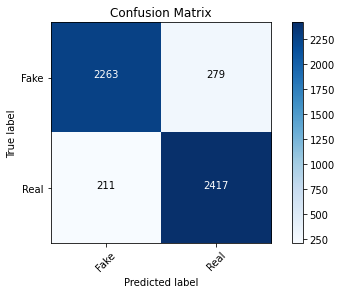

In [70]:
cm3 = metrics.confusion_matrix(Y_test_3, X_test_prediction_3)
plot_confusion_matrix(cm3, classes=['Fake', 'Real'])

## Prediction Fake or Real news

### [Data1 : author, title, text fillna with " "]

In [ ]:
X_test_sample = X_test[25]

In [ ]:
predict = Model.predict(X_test_sample)
print(predict)

In [ ]:
print(Y_test[25])

### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with None-Title)  
### text --> (fillna with " ")]

In [ ]:
X_test_sample_2 = X_test_2[25]

In [ ]:
predict2 = Model.predict(X_test_sample_2)
print(predict2)

In [ ]:
print(Y_test_2[25])

In [77]:
### [Data2 :
### author --> (fillna with Anonymous) 
### title --> (fillna with None-Title)  
### text --> (fillna with " ")]

X_test_sample_3 = X_test_3[25]

predict3 = Model3.predict(X_test_sample_3)
print(predict3)

print(Y_test_3[25])

[0]
0
